# A look into who survived the sinking of the Titanic

This analysis explores a sample of Titanic passengers for various insights into who surived. It will answer the following question. Which factors made a passenger more likely to survive the sinking of the Titanic?

It is a tentative work in progress.

In [12]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
   
def survival_pie_chart(title, survival_rate):
    '''
    Creates a simple pie chart that displays survival and non survival rate.
    Takes a title and the survival_rate.
    '''
    labels = 'Survived', 'Perished'
    sizes = [survival_rate*100,(1-survival_rate)*100]
    colors = ["#c6e2ff", "#990000"]
    
    plt.pie(
        sizes,
        labels=labels,
        shadow=False,
        colors=colors,
        explode=(0, 0),
        startangle=90,
        autopct='%1.1f%%'
        )
    
    plt.title(title);

    plt.axis('equal')

    plt.tight_layout()
    plt.show()

passenger_data = pd.read_csv('titanic-data.csv', index_col='PassengerId')

#passenger_data.head(5)

## Overall survival rate

As an introduction to the analysis, here's the overall survival rate for the sample

### 38.3% of passengers survived

In [11]:
# note: for survival rate,
#       it's safe to use the mean() value of the Survived column,
#       since 1 represents survived and 0 represents didn't survive,
#       and the mean simply adds those values up and divides by the total
#       number of passengers

overall_survival_rate = passenger_data.mean()['Survived']

print "overall survival rate:"
print passenger_data.mean()['Survived']

overall survival rate:
0.383838383838


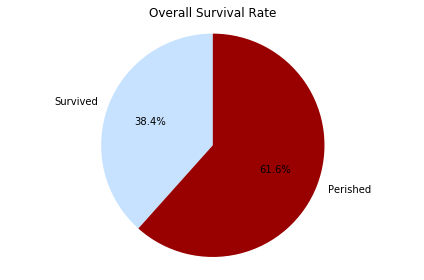

In [10]:
survival_pie_chart('Overall Survival Rate', overall_survival_rate)

In [15]:
survival_rate_by_sex = passenger_data.groupby('Sex').mean()['Survived']
print survival_rate_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


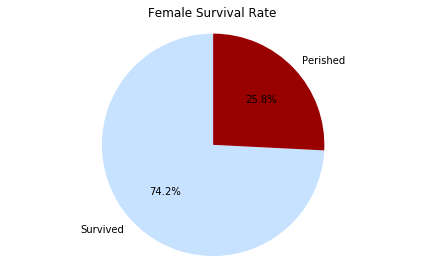

In [17]:
survival_pie_chart('Female Survival Rate', survival_rate_by_sex['female'])

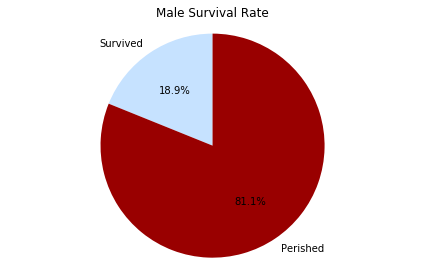

In [18]:
survival_pie_chart('Male Survival Rate', survival_rate_by_sex['male'])

## Survival rate by age

This analysis breaks passengers into three age groups: children (0-14 years old), adolescents (14-20 years old), and adults (21+ years old). This is an arbitrary distinction that probably reflects a modern bias, but hopefully it yields equally interesting insights.

### 58.4% of children survived

### 36.3% of adolescents survived

### 38.9% of adults survived

In [30]:
# note: while the data has a number of empty values for age,
#       the mean() function ignores those, so we can safely
#       calculate it without modifying that column

# data wrangling: added a new column 'age_group' to passenger_data
#                 so that we can easily calculate the mean survival rate

# define the bin values and group names
bins = [0,14,20,100]
group_names = ['Children', 'Adolescents', 'Adults']

# create a new column 'age_group' and add it to the data
age_group = pd.cut(passenger_data['Age'], bins, labels=group_names)
passenger_data['age_group'] = age_group

# get survival rate by age group
survival_rate_by_age = passenger_data.groupby('age_group').mean()['Survived']
print survival_rate_by_age

age_group
Children       0.584416
Adolescents    0.362745
Adults         0.388785
Name: Survived, dtype: float64


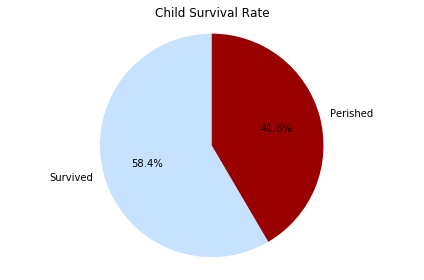

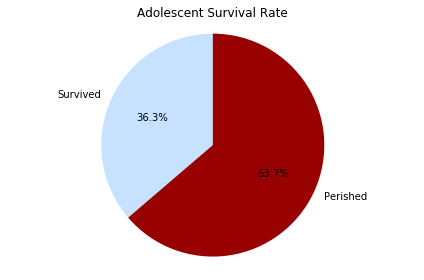

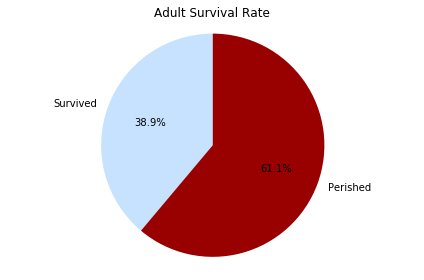

In [31]:
survival_pie_chart('Child Survival Rate', survival_rate_by_age[0])
survival_pie_chart('Adolescent Survival Rate', survival_rate_by_age[1])
survival_pie_chart('Adult Survival Rate', survival_rate_by_age[2])

## Survival by ticket class

Passengers could purchase three types of tickets to board the Titanic: first class, second class, and third class. Here's the breakdown of the survival rate by ticket class.

### 62.9% of first class ticket holders survived

### 47.3% of second class ticket holders survived

### 24.2% of third class ticket holders survived

In [32]:
survival_rate_by_ticket_class = passenger_data.groupby('Pclass').mean()['Survived']
print survival_rate_by_ticket_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


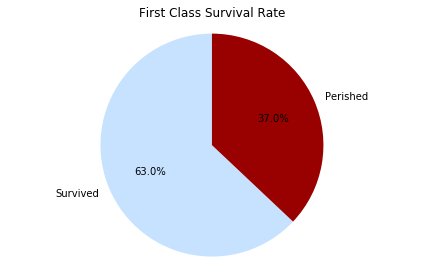

In [34]:
survival_pie_chart('First Class Survival Rate', survival_rate_by_ticket_class[1])